# Error Analysis: Classification

By: Jimuel Celeste, Jr. 

Objective: To analyze the errors of the best performing classification model.

In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
sns.set_context('paper')
sns.set_style('ticks')

## Wav2Vec + Standard Scaler + PCA + MLP

In [3]:
model = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Machine Learning/Classification/Nested Cross-Validation/wav2vec/multilayer_perceptron_classifier/final_model/model.pkl'
with open(model, 'rb') as f:
    pipe = pickle.load(f)

In [4]:
pipe

Pipeline(steps=[('feature_scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('model',
                 MLPClassifier(alpha=0.1, hidden_layer_sizes=100,
                               max_iter=10000, random_state=52))])

## Confusion Matrix

In [5]:
input_dir = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Machine Learning/Classification/Nested Cross-Validation/wav2vec/multilayer_perceptron_classifier'

preds_arr = []
folds = 5
for fold in range(folds):
    pred_file = os.path.join(input_dir, f"fold_{fold}", "outer_validation_predictions.csv")
    preds = pd.read_csv(pred_file)
    preds_arr.append(preds)
preds_df = pd.concat(preds_arr)
preds_df['record_id'] = preds_df['filename'].apply(lambda x: x.split('.')[0])
preds_df

,filename,predictions,labels,record_id
0,S002.csv,0,0,S002
1,S007.csv,1,0,S007
2,S015.csv,1,0,S015
3,S020.csv,0,0,S020
4,S028.csv,0,0,S028
...,...,...,...,...
87,adrso292.csv,1,0,adrso292
88,adrso294.csv,0,0,adrso294
89,adrso302.csv,0,0,adrso302
90,adrso309.csv,0,0,adrso309


In [6]:
cm = confusion_matrix(y_true=preds_df['labels'], y_pred=preds_df['predictions'])
cm

array([[203,  24],
       [ 27, 208]])

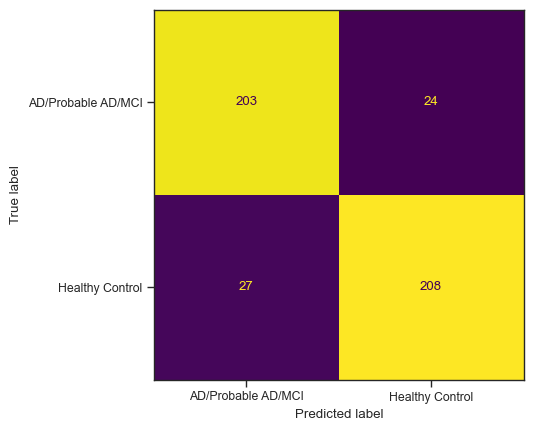

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AD/Probable AD/MCI', 'Healthy Control'])
disp.plot()
disp.im_.colorbar.remove()

output_dir = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Analysis/classification'
output_file = os.path.join(output_dir, 'clf_best_model_cv_confusion_matrix.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)

plt.show()

## Age/Sex Distribution of Misclassifications

In [8]:
# linking with metadata
metadata_csv = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Features/Thesis - wav2vec Features/metadata_cv_english.csv'
metadata = pd.read_csv(metadata_csv)
metadata

,filename,record_id,subject_id,age,sex,educ,mmse,dx,dx_binary,dataset,language
0,S002.csv,S002,S002,62.0,F,NaN,30.0,NC,0,ADReSS,en
1,S003.csv,S003,S003,69.0,F,NaN,29.0,NC,0,ADReSS,en
2,S004.csv,S004,S004,71.0,F,NaN,30.0,NC,0,ADReSS,en
3,S005.csv,S005,S005,74.0,F,NaN,30.0,NC,0,ADReSS,en
4,S006.csv,S006,S006,67.0,F,NaN,29.0,NC,0,ADReSS,en
...,...,...,...,...,...,...,...,...,...,...,...
457,adrso313.csv,adrso313,adrso313,63.0,F,13.0,28.0,NC,0,ADReSS-M,en
458,adrso314.csv,adrso314,adrso314,61.0,F,12.0,29.0,NC,0,ADReSS-M,en
459,adrso315.csv,adrso315,adrso315,58.0,M,NaN,28.0,NC,0,ADReSSo,en
460,adrso316.csv,adrso316,adrso316,56.0,M,NaN,30.0,NC,0,ADReSSo,en


In [9]:
def label_prediction(x):
    return 'correct classification' if x else 'misclassification'
    
df = pd.merge(left=preds_df.copy(deep=True), right=metadata, on='record_id')
df['classification'] = df['predictions'] == df['labels'] 
df['classification'] = df['classification'].apply(lambda x: label_prediction(x))
df

,filename_x,predictions,labels,record_id,filename_y,subject_id,age,sex,educ,mmse,dx,dx_binary,dataset,language,classification
0,S002.csv,0,0,S002,S002.csv,S002,62.0,F,NaN,30.0,NC,0,ADReSS,en,correct classification
1,S007.csv,1,0,S007,S007.csv,S007,71.0,M,NaN,28.0,NC,0,ADReSS,en,misclassification
2,S015.csv,1,0,S015,S015.csv,S015,70.0,F,NaN,29.0,NC,0,ADReSS,en,misclassification
3,S020.csv,0,0,S020,S020.csv,S020,58.0,M,NaN,27.0,NC,0,ADReSS,en,correct classification
4,S028.csv,0,0,S028,S028.csv,S028,59.0,M,NaN,29.0,NC,0,ADReSS,en,correct classification
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,adrso292.csv,1,0,adrso292,adrso292.csv,adrso292,65.0,F,NaN,28.0,NC,0,ADReSSo,en,misclassification
458,adrso294.csv,0,0,adrso294,adrso294.csv,adrso294,63.0,M,12.0,29.0,NC,0,ADReSS-M,en,correct classification
459,adrso302.csv,0,0,adrso302,adrso302.csv,adrso302,65.0,M,NaN,29.0,NC,0,ADReSSo,en,correct classification
460,adrso309.csv,0,0,adrso309,adrso309.csv,adrso309,54.0,F,NaN,30.0,NC,0,ADReSSo,en,correct classification


In [10]:
df[['age', 'sex']].isna().sum()

age    71
sex    71
dtype: int64

71/462 records do not have age and sex information.

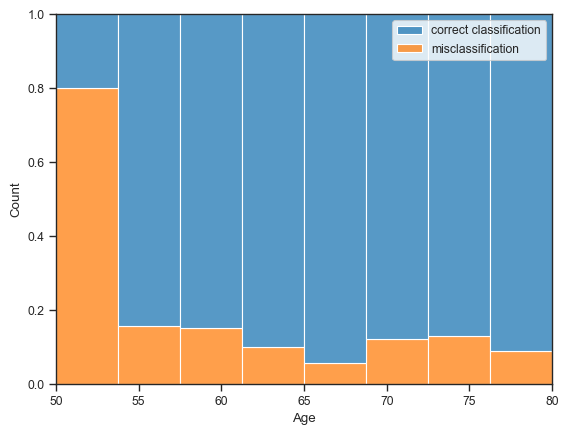

In [11]:
g = sns.histplot(df.dropna(subset=['age', 'sex']), x="age", hue="classification", multiple="fill", bins=8)
g.get_legend().set_title('')
plt.xlabel('Age')

output_file = os.path.join(output_dir, 'clf_best_model_cv_age.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)

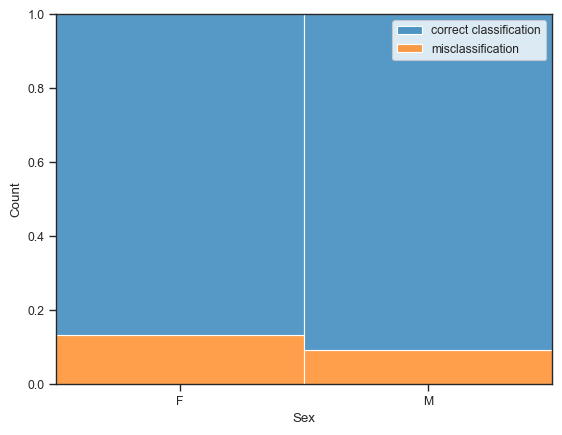

In [12]:
g = sns.histplot(df.dropna(subset=['age', 'sex']), x="sex", hue="classification", multiple="fill")
g.get_legend().set_title('')
plt.xlabel('Sex')

output_file = os.path.join(output_dir, 'clf_best_model_cv_sex.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)

## Combining the figures

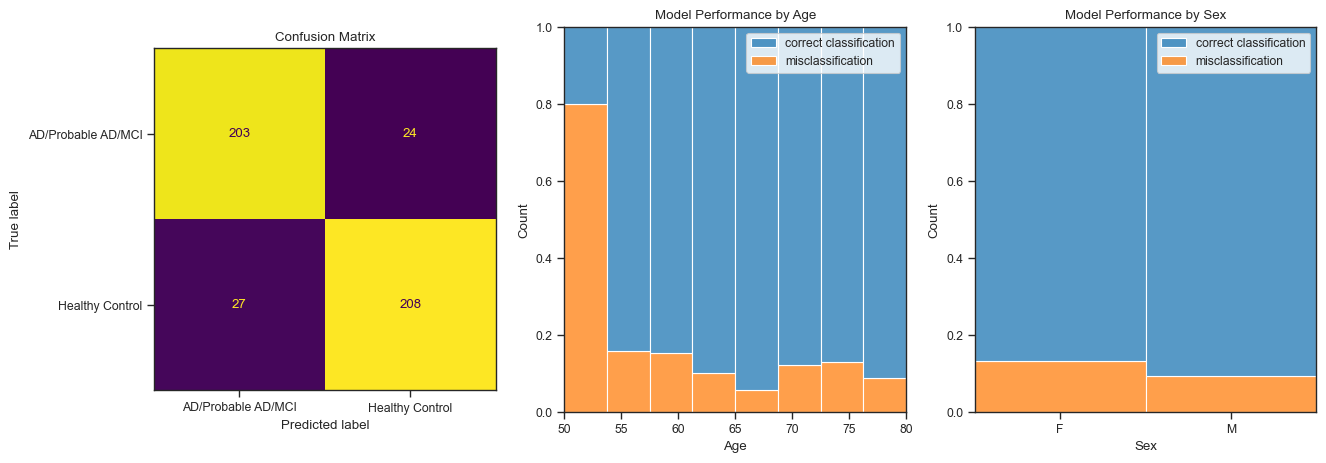

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AD/Probable AD/MCI', 'Healthy Control'])
disp.plot(ax=axs[0])
disp.im_.colorbar.remove()
axs[0].set_title('Confusion Matrix')

g = sns.histplot(df.dropna(subset=['age', 'sex']), x="age", hue="classification", multiple="fill", bins=8, ax=axs[1])
g.get_legend().set_title('')
g.set_xlabel('Age')
axs[1].set_title('Model Performance by Age')

h = sns.histplot(df.dropna(subset=['age', 'sex']), x="sex", hue="classification", multiple="fill", ax=axs[2])
h.get_legend().set_title('')
h.set_xlabel('Sex')
axs[2].set_title('Model Performance by Sex')

output_file = os.path.join(output_dir, 'clf_best_model_cv_error_analysis.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)